<a href="https://colab.research.google.com/github/Jesus2342/Computer_vision/blob/proyecto_final/steer_angle_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import numpy as np
import cv2
import os
from sklearn.model_selection import train_test_split


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
DIR = "/content/drive/MyDrive/Colab Notebooks/Vision_computacional/deep_net/"
os.chdir(DIR)

In [ ]:

#Path del primer archivo csv
image_folder_path_1 ="/content/drive/MyDrive/Colab Notebooks/Vision_computacional/deep_net/DAY_1_Dataset"
os.chdir(image_folder_path_1)
csv_file_day_1 = "day_1_dataset_report.csv" #Nombre del primer archivo excel
dataset_day_1 = pd.read_csv(csv_file_day_1)

dataset_day_1.head(3)

,image_name,steering_angle
0,2024-06-19 18-53-22.png,0.00
1,2024-06-19 18-53-27.png,0.08
2,2024-06-19 18-53-32.png,0.08


In [ ]:
print(image_folder_path_1)

/content/drive/MyDrive/Colab Notebooks/Vision_computacional/deep_net/DAY_1_Dataset


In [ ]:
#Estrategia: Las imagenes deben estandarizar una dimension de 36x18, ademas de contar con dos canales.

def estandarizar(imagen):
    img=cv2.imread(imagen)
    dim=img.shape

    #Obtener las dimensiones de la imagen en gris
    current_weight, current_height =img.shape[:2]

    #Acorde a nuestro patron de clasificacion, las imagenes deben medir 64x64

    std_weight=64
    std_height=64

    #Escenario si nuestra imagen tiene un alto y ancho diferente al especificado
    if current_height>std_height or current_weight>std_weight:
        #Actualizar la altura actual
        current_height=std_height
        #Actualizar el ancho actual
        current_weight=std_weight
        #Confirmar las dimensiones
        updated_dim=(current_height,current_weight)
        #Realizar el resize
        img=cv2.resize(img,updated_dim)
        #Normalizar
        img=img/255


    #Cambio a gris si hay 3 colores en la imagen
    #if (len(dim)==3):
     #   img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    #Si la imagen ya tiene dos calores se conserva sin hacer cambios
   # else:
    #    img_gray = img


    return img

In [ ]:
imagenes=[]
angulos=[]

In [ ]:
for index, row in dataset_day_1.iterrows():
    img_path= os.path.join(image_folder_path_1,row['image_name'])
    img=estandarizar(img_path)
    imagenes.append(img)
    angulos.append(row['steering_angle'])

In [ ]:
def iteracion_index_row(data_set_day, path_imagenes):
    for index, row in data_set_day.iterrows():
        img_path= os.path.join(path_imagenes,row['image_name'])
        img=estandarizar(img_path)
        imagenes.append(img)
        angulos.append(row['steering_angle'])

    return imagenes, angulos


In [ ]:
lectura_imagenes_angulos_dataset_1=iteracion_index_row(dataset_day_1, image_folder_path_1)

In [ ]:
print(f"Cantidad de imagenes: {len(imagenes)}")
print(f"Cantidad de angulos: {len(angulos)}")

Cantidad de imagenes: 562
Cantidad de angulos: 562


In [ ]:
print(image_folder_path_1)

/content/drive/MyDrive/Colab Notebooks/Vision_computacional/deep_net/DAY_1_Dataset


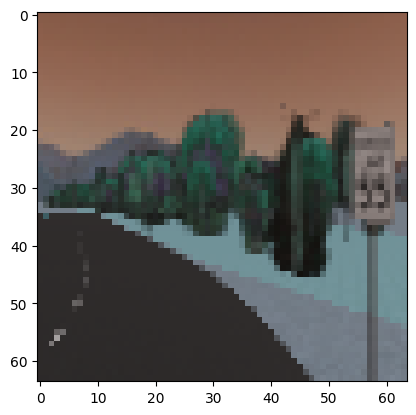

In [ ]:
plt.imshow(imagenes[327])

In [ ]:
print(angulos[327])

-0.2


In [ ]:
#Path del primer archivo csv
image_folder_path_2 ="/content/drive/MyDrive/Colab Notebooks/Vision_computacional/deep_net/DAY_2_Dataset"
os.chdir(image_folder_path_2)
csv_file_day_2 = "day_2_dataset_report.csv" #Nombre del primer archivo excel
dataset_day_2 = pd.read_csv(csv_file_day_2)

dataset_day_2.head(3)

,image_name,steering_angle
0,2024-06-20 17-19-05.png,0.00
1,2024-06-20 17-19-10.png,0.12
2,2024-06-20 17-19-15.png,0.12


In [ ]:
for index, row in dataset_day_2.iterrows():
    img_path= os.path.join(image_folder_path_2,row['image_name'])
    print(img_path)
    img=estandarizar(img_path)
    imagenes.append(img)
    angulos.append(row['steering_angle'])

/content/drive/MyDrive/Colab Notebooks/Vision_computacional/deep_net/DAY_2_Dataset/2024-06-20 17-19-05.png
/content/drive/MyDrive/Colab Notebooks/Vision_computacional/deep_net/DAY_2_Dataset/2024-06-20 17-19-10.png
/content/drive/MyDrive/Colab Notebooks/Vision_computacional/deep_net/DAY_2_Dataset/2024-06-20 17-19-15.png
/content/drive/MyDrive/Colab Notebooks/Vision_computacional/deep_net/DAY_2_Dataset/2024-06-20 17-19-20.png
/content/drive/MyDrive/Colab Notebooks/Vision_computacional/deep_net/DAY_2_Dataset/2024-06-20 17-19-25.png
/content/drive/MyDrive/Colab Notebooks/Vision_computacional/deep_net/DAY_2_Dataset/2024-06-20 17-19-30.png
/content/drive/MyDrive/Colab Notebooks/Vision_computacional/deep_net/DAY_2_Dataset/2024-06-20 17-19-35.png
/content/drive/MyDrive/Colab Notebooks/Vision_computacional/deep_net/DAY_2_Dataset/2024-06-20 17-19-40.png
/content/drive/MyDrive/Colab Notebooks/Vision_computacional/deep_net/DAY_2_Dataset/2024-06-20 17-19-45.png


KeyboardInterrupt: 

In [ ]:
img_path

'/content/drive/MyDrive/Colab Notebooks/Vision_computacional/deep_net/DAY_2_Dataset/2024-06-19 18-53-22.png'

In [ ]:
X = np.array(imagenes)
y = np.array(angulos)

In [ ]:
#Division de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)


In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1)  # regresión del angulo predicho
])

# Compilación del modelo
model.compile(optimizer='adam', loss='mean_squared_error', metrics=["accuracy"])

# Entrenamiento
model.fit(X_train, y_train, epochs=50,  batch_size=32)

# Evaluación del modelo
test_loss = model.evaluate(X_test, y_test)


Epoch 1/50
30/30 [==============================] - 9s 260ms/step - loss: 0.0298 - accuracy: 0.1369
Epoch 2/50
30/30 [==============================] - 7s 222ms/step - loss: 0.0216 - accuracy: 0.1369
Epoch 3/50
30/30 [==============================] - 8s 281ms/step - loss: 0.0213 - accuracy: 0.1369
Epoch 4/50
30/30 [==============================] - 5s 176ms/step - loss: 0.0209 - accuracy: 0.1369
Epoch 5/50
30/30 [==============================] - 6s 217ms/step - loss: 0.0202 - accuracy: 0.1369
Epoch 6/50
30/30 [==============================] - 6s 209ms/step - loss: 0.0197 - accuracy: 0.1369
Epoch 7/50
30/30 [==============================] - 5s 173ms/step - loss: 0.0198 - accuracy: 0.1369
Epoch 8/50
30/30 [==============================] - 7s 250ms/step - loss: 0.0191 - accuracy: 0.1369
Epoch 9/50
30/30 [==============================] - 5s 173ms/step - loss: 0.0185 - accuracy: 0.1369
Epoch 10/50
30/30 [==============================] - 6s 205ms/step - loss: 0.0178 - accuracy: 0.1369